## Unit 7 | Assignment - Distinguishing Sentiments

## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  


## Copyright

Coding Boot Camp (C) 2017. All Rights Reserved.

<h2>Trends</h2>
<ul>
<li>Tweets from all media organizations range widely, but most are neutral</li>
<li>Fox News has an overall negative sentiment</li>
<li>CBS has an overall positive sentiment</li>
</ul>

In [1]:
# Dependencies
from object_oriented_context import api # tweepy cursor does not work with JSON.
import object_oriented_context
import tweepy
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
from datetime import timezone    

Luis Cipher


In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [3]:
# Select news orgainizations.
news_organizations = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

In [4]:
# Create an empty dataframe to store sentiment values.
df = pd.DataFrame(news_organizations)

# Rename column 0 to News for news organization.
df = df.rename(columns={0:"News"})

df['Timestamp'] = ""
df['Positive'] = 0.0
df['Neutral'] = 0.0
df['Negative'] = 0.0
df['Compound'] = 0.0
df['Tweet'] = ""

df.drop(df.head(len(news_organizations)).index, inplace = True)

df 

Empty DataFrame
Columns: [News, Timestamp, Positive, Neutral, Negative, Compound, Tweet]
Index: []

In [5]:
# Get 100 tweets per news organization then store the sentiment.
for target_user in news_organizations:

    # Twenty text entries per page.
    try:
        for page in tweepy.Cursor(api.user_timeline, id=target_user).pages(5):

            # Sleep for two seconds to avoid tweepy.RateLimitError
            time.sleep(2)

            for text_entry in page:

                content = text_entry.text
                
                # Run analysis
                compound = analyzer.polarity_scores(content)["compound"]
                pos = analyzer.polarity_scores(content)["pos"]
                neu = analyzer.polarity_scores(content)["neu"]
                neg = analyzer.polarity_scores(content)["neg"]

                row_index = len(df.index)

                df.set_value(row_index, 'News', target_user)
                df.set_value(row_index, 'Positive', pos)
                df.set_value(row_index, 'Neutral', neu)
                df.set_value(row_index, 'Negative', neg)
                df.set_value(row_index, 'Compound', compound)
                
                ts = datetime.strptime(text_entry._json["created_at"], '%a %b %d %H:%M:%S %z %Y')\
                    .replace(tzinfo=timezone.utc)\
                    .astimezone(tz=None).strftime('%Y-%m-%d %H:%M:%S')
                               
                df.set_value(row_index, 'Timestamp', ts)
                
                df.set_value(row_index, 'Tweet', content)
                
    except tweepy.RateLimitError as error:
        print("tweepy.RateLimitError was thrown:")
        print("Waiting one minute before proceeding.")    
        time.sleep(60)
    
df.head()


News            Timestamp  Positive  Neutral  Negative  Compound  \
0  @BBC  2018-03-18 13:30:11     0.000    1.000     0.000    0.0000   
1  @BBC  2018-03-18 13:03:04     0.090    0.824     0.086    0.0258   
2  @BBC  2018-03-18 12:33:04     0.197    0.803     0.000    0.5994   
3  @BBC  2018-03-18 11:44:02     0.000    0.837     0.163   -0.5994   
4  @BBC  2018-03-18 11:34:14     0.151    0.772     0.077    0.2040   

                                               Tweet  
0  🏃💪 @LesDennis, @SimplySusannah, @Tameka_Empson...  
1  👎💌 Fans of K-Pop boyband member @IBGDRGN have ...  
2  Saoirse Ronan stars as Eilis, a young girl who...  
3  Ruth Ellis was only 28 when she became the las...  
4  RT @BBC_TopGear: 840bhp goes a little like thi...

In [6]:
# Check for 100 tweets per media source.
len(df.index)

500

In [7]:
# Check if filtering works.
df2 = df.loc[df['News'] == '@BBC']
df2 = df2.sort_values(by=['Timestamp'])
df2.head()

News            Timestamp  Positive  Neutral  Negative  Compound  \
99  @BBC  2018-03-14 01:35:41     0.000    1.000       0.0    0.0000   
98  @BBC  2018-03-14 02:00:05     0.252    0.748       0.0    0.5719   
97  @BBC  2018-03-14 03:01:19     0.000    1.000       0.0    0.0000   
96  @BBC  2018-03-14 03:27:40     0.000    1.000       0.0    0.0000   
95  @BBC  2018-03-14 04:30:12     0.000    1.000       0.0    0.0000   

                                                Tweet  
99  Despite 8 million tonnes of plastic entering U...  
98  'I was homeless on these streets - I'm the per...  
97  RT @BBCArchive: Stephen Hawking first appeared...  
96  'You could ask my dad any question.'\n\nIn mem...  
95  💫 Stephen Hawking: A life in pictures.\n📸 👉 ht...

In [8]:
# Format today's date for display.
date_str = datetime.today().strftime('%Y-%m-%d')
print(date_str)

2018-03-18


In [27]:
# Write weather dataframe to csv file.
df.to_csv("media_sentiment.csv")

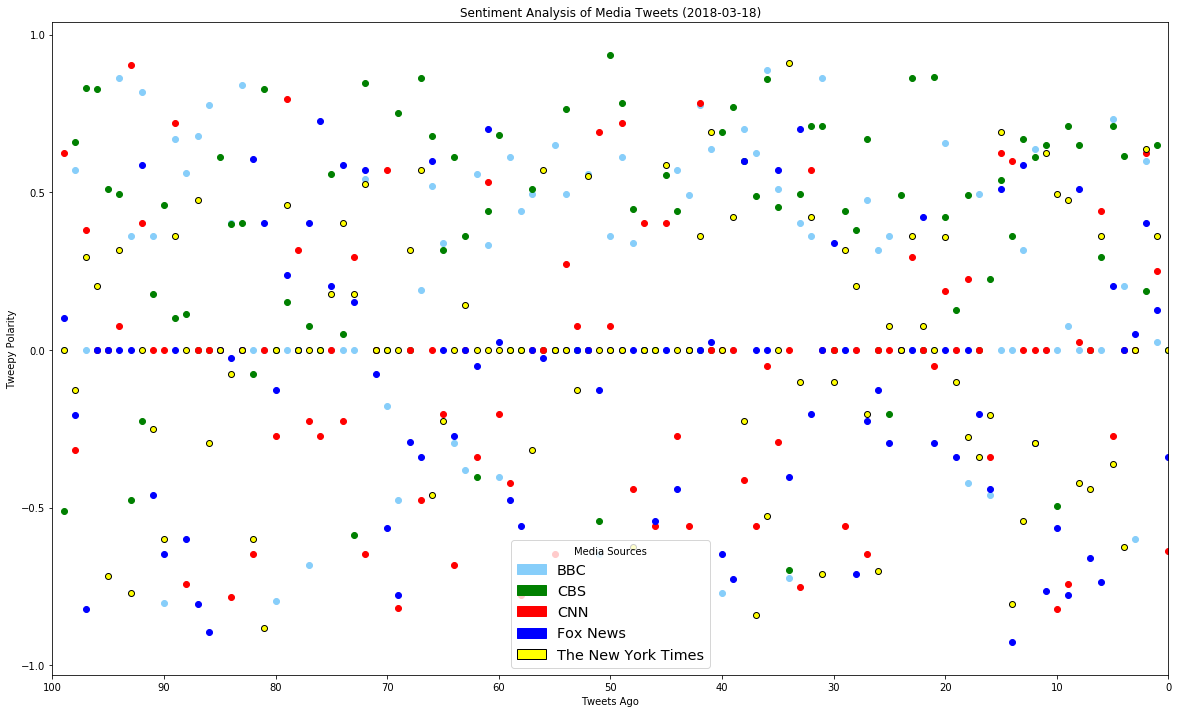

In [10]:
# Plot detail sentiments.
plt.figure(figsize=(20,12))

# Format axis
plt.xticks(np.arange(0, 110, 10))
plt.xlim(100, 0)
plt.yticks(np.arange(-2, 2, .5))

# Format labels
plt.xlabel('Tweets Ago')
plt.ylabel('Tweepy Polarity')
plt.title('Sentiment Analysis of Media Tweets (' + date_str + ')')

# Add a custom legend.
bbc_patch = mpatches.Patch(color='lightskyblue', label='BBC')
cbs_patch = mpatches.Patch(color='green', label='CBS')
cnn_patch = mpatches.Patch(color='red', label='CNN')
fox_patch = mpatches.Patch(color='blue', label='Fox News')
nyt_patch = mpatches.Patch(facecolor='yellow', edgecolor = 'black', label='The New York Times')
plt.legend(title="Media Sources", fontsize='x-large', \
           handles=[bbc_patch, cbs_patch, cnn_patch, fox_patch, nyt_patch])

# Process each news organization.
for news_organization in news_organizations:
 
    # Set the color for plotting the news organization.
    if news_organization == '@BBC':
        news_color = 'lightskyblue'
        edge_color = news_color
    elif news_organization == '@CBS':
        news_color = 'green'
        edge_color = news_color
    elif news_organization == '@CNN':
        news_color = 'red'
        edge_color = news_color
    elif news_organization == '@FoxNews':
        news_color = 'blue'
        edge_color = news_color
    elif news_organization == '@nytimes':
        news_color = 'yellow'
        edge_color = 'black'
    else:
        news_color = 'black'
    
    # Create a dataframe for the news organization for plotting.
    df2 = df.loc[df['News'] == news_organization]
    
    # Renumber the row index.  
    df2.index = pd.RangeIndex(len(df2.index))
    
    # Select and order the values.
    y_axis = list(reversed(df2.loc[:,'Compound']))
    x_axis = list(reversed(np.arange(0, len(y_axis))))
    
    # Plot the news organization.
    plt.scatter(x_axis, y_axis, color = news_color, edgecolors = edge_color)

# Show all plots.
plt.show()

In [11]:
# Pull enough detail for the summary plot.
df3 = df.loc[:,['News', 'Compound']]
df3.head()

News  Compound
0  @BBC    0.0000
1  @BBC    0.0258
2  @BBC    0.5994
3  @BBC   -0.5994
4  @BBC    0.2040

In [14]:
# Aggregate the mean compound score for each news organization.
df4 = df3.groupby('News').agg({'mean'})
df4.head()

Compound
              mean
News              
@BBC      0.180383
@CBS      0.304366
@CNN     -0.037818
@FoxNews -0.078719
@nytimes  0.000768

In [23]:
# Move the News row index into a column.
df5 = df4.reset_index()
df5

News  Compound
                 mean
0      @BBC  0.180383
1      @CBS  0.304366
2      @CNN -0.037818
3  @FoxNews -0.078719
4  @nytimes  0.000768

In [24]:
# Remove the top-level labels of News and Component.
df5.columns = df5.columns.droplevel(0)

# Sort rows by the mean compound value.
df5 = df5.sort_values(by='mean')

# Rename the columns.
df5.columns = ['News', 'Compound']

# Resequence the row key.
df5.index = pd.RangeIndex(len(df5.index))
df5

News  Compound
0  @FoxNews -0.078719
1      @CNN -0.037818
2  @nytimes  0.000768
3      @BBC  0.180383
4      @CBS  0.304366

In [25]:
# Pull out values for the summary plot.
x_axis = list(df5.loc[:,'News'])
y_axis = df5['Compound']
print(x_axis)
print(y_axis)

['@FoxNews', '@CNN', '@nytimes', '@BBC', '@CBS']
0   -0.078719
1   -0.037818
2    0.000768
3    0.180383
4    0.304366
Name: Compound, dtype: float64


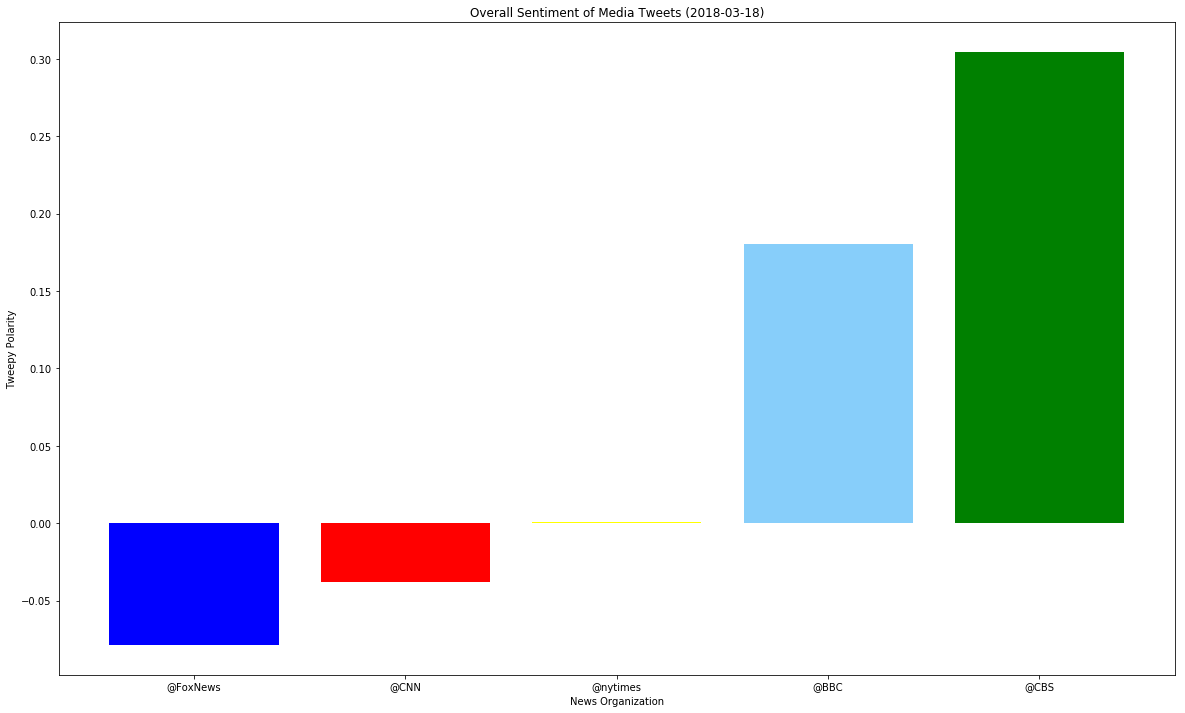

In [26]:
# Create a scatter plot of compound sentiment values.
plt.figure(figsize=(20,12))

# Format labels
plt.xlabel('News Organization')
plt.ylabel('Tweepy Polarity')
plt.title('Overall Sentiment of Media Tweets (' + date_str + ')')


x_range = np.arange(0, len(df5.index))

for i in x_range:
    
        # Set the color for plotting the news organization.
    if x_axis[i] == '@BBC':
        news_color = 'lightskyblue'
        edge_color = news_color
    elif x_axis[i] == '@CBS':
        news_color = 'green'
        edge_color = news_color
    elif x_axis[i] == '@CNN':
        news_color = 'red'
        edge_color = news_color
    elif x_axis[i] == '@FoxNews':
        news_color = 'blue'
        edge_color = news_color
    elif x_axis[i] == '@nytimes':
        news_color = 'yellow'
        edge_color = 'black'
    else:
        news_color = 'black'
  
    plt.bar(i, y_axis[i], facecolor = news_color)
    
plt.xticks(x_range, x_axis)



    
plt.show()